找到文件: ../../RUMDECT/RFC/RFC_Unc_Margin/AL_round_0.pkl
找到文件: ../../RUMDECT/RFC/RFC_Unc_Margin/AL_round_1.pkl
找到文件: ../../RUMDECT/RFC/RFC_Unc_Margin/AL_round_2.pkl
找到文件: ../../RUMDECT/RFC/RFC_Unc_Margin/AL_round_3.pkl
找到文件: ../../RUMDECT/RFC/RFC_Unc_Margin/AL_round_4.pkl
找到文件: ../../RUMDECT/RFC/RFC_Unc_Margin/AL_round_5.pkl
找到文件: ../../RUMDECT/RFC/RFC_Unc_Margin/AL_round_6.pkl
找到文件: ../../RUMDECT/RFC/RFC_Unc_Margin/AL_round_7.pkl
找到文件: ../../RUMDECT/RFC/RFC_Unc_Margin/AL_round_8.pkl
找到文件: ../../RUMDECT/RFC/RFC_Unc_Margin/AL_round_9.pkl


<module 'matplotlib.pyplot' from '/home/zsc/miniconda3/envs/al/lib/python3.9/site-packages/matplotlib/pyplot.py'>

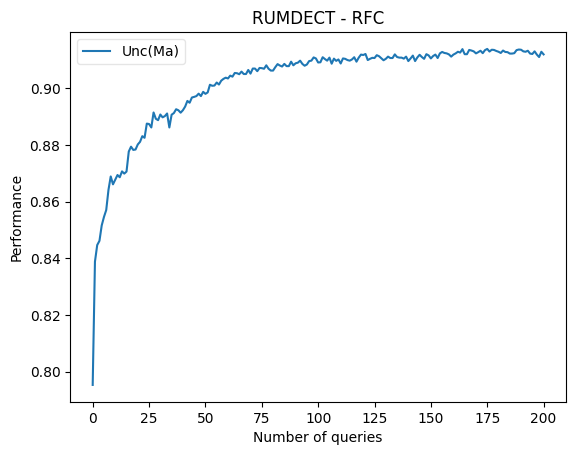

In [1]:
import alipy
from alipy import experiment
from alipy.experiment import ExperimentAnalyser
import os


def load_models_folds(model, num_files,strategy,directory=None):
    model_folds=[]
    if directory is None:
        directory='../../RUMDECT/RFC/RFC_Unc_Margin/'
    for i in range(num_files):
        file_name = 'AL_round_' + str(i) + '.pkl'
        file_path = os.path.join(directory, file_name)

        if os.path.isfile(file_path):
            # 这里可以对找到的文件进行操作或处理
            file = alipy.experiment.StateIO.load(file_path)
            model_folds.append(file)
            print('找到文件:', file_path)
        else:
            print('未找到文件:', file_path)
    return model_folds

model='RFC'
#加载策略folds
DW_folds =load_models_folds(model=model, num_files=10,strategy='Unc(Ma)')


#初始化StateIOContainer
StateIOContainer_DW = alipy.experiment.StateIOContainer(method_name='Unc(Ma)', method_results=[])

#将folds装载进StateIOContainer
alipy.experiment.StateIOContainer.add_folds(self=StateIOContainer_DW, folds=DW_folds)


#使用analyser分析绘图
analyser1 = ExperimentAnalyser()

analyser1.add_method(method_name='Unc(Ma)', method_results=StateIOContainer_DW)

analyser1.plot_learning_curves(title='RUMDECT - RFC',show=False,saving_path="./rumdect_rfc_margin.pdf")
#plt_Ada=analyser1.plot_learning_curves(title='PHEME - Unc(Ma)',show=False,saving_path="./pheme_lda_dw.pdf")
#plt_Ada.ylim(0.5, 0.74)
#plt_Ada.legend(loc=4)
#plt_Ada.axhline(y=0.892, color='darkgray', linestyle='--', label='Horizontal Line')
#plt_Ada.show()